In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

from mpl_toolkits.mplot3d import Axes3D

## -------------------------
### BRAZILIAN CASE
## -------------------------

In [12]:
#here we import the database and start treating the numerical data

df = pd.read_excel(r"Brasil_Recall_KNKN.xlsx")
df = df[(df['Setor']=='Automotivos') | (df['Setor']=='Ciclomotores') | (df['Setor']=='Veículo Automotores')]
df = df[['Tipo de Risco','Fabricante','Quantidade Afetada','País de Origem','Ano de Fabricação','Data Início']]
df = df.dropna().reset_index(drop=True)
df['Ano de Fabricação'] = df['Ano de Fabricação'].astype(int)
df['Quantidade Afetada'] = df['Quantidade Afetada'].astype(int)
df = df[df['Quantidade Afetada']>0]

df['Day'] = df['Data Início'].str[:2].astype(int)
df['Month'] = df['Data Início'].str[3:5].astype(int)
df['Year'] = df['Data Início'].str[-4:].astype(int)
df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365

#filter: only >2010 and < 2020
df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
df = df[['Tipo de Risco','Fabricante','País de Origem','Ano de Fabricação']]

df

,Tipo de Risco,Fabricante,País de Origem,Ano de Fabricação
0,Não funcionamento adequado do produto,Takata,Japão,2012
1,Fogo,Polaris,Brasil,2015
2,Não funcionamento adequado do produto,Ducati,Itália,2015
3,Fogo,Polaris,Estados Unidos,2013
4,Fogo,Polaris,Estados Unidos,2016
...,...,...,...,...
142,Cortes/Ferimentos,Volvo Car,Brasil,2018
143,Cortes/Ferimentos,Ducati,Brasil,2017
144,Cortes/Ferimentos,General Motors,Brasil,2017
146,Fogo,Peugeot Citroen,Brasil,2018


In [13]:
df['País Fabricante'] = None
asian = ['Honda','Nissan','Suzuki','Takata','Yamaha Motor']
american = ['Bombardier Recreational Products','Dafra','General Motors','Harley-Davidson','Polaris','SVB','Specialized Brasil Comércio de Bicicletas LTDA.']
european = ['BMW','Ducati','Mercedes-Benz','Peugeot Citroen','Thule','Triumph','Volkswagen','Volvo Car']
for index, row in df.iterrows():
    if row['Fabricante'] in asian:
        df.at[index, 'País Fabricante'] = 'Asian'
    if row['Fabricante'] in american:
        df.at[index, 'País Fabricante'] = 'American'
    if row['Fabricante'] in european:
        df.at[index, 'País Fabricante'] = 'European'
        
df = df.sort_values(by='País Fabricante')

df

,Tipo de Risco,Fabricante,País de Origem,Ano de Fabricação,País Fabricante
115,Cortes/Ferimentos,Bombardier Recreational Products,México,2011,American
29,Cortes/Ferimentos,Specialized Brasil Comércio de Bicicletas LTDA.,Brasil,2011,American
31,Cortes/Ferimentos,Harley-Davidson,Estados Unidos,2013,American
32,Cortes/Ferimentos,Harley-Davidson,Brasil,2014,American
33,Cortes/Ferimentos,Bombardier Recreational Products,Canadá,2012,American
...,...,...,...,...,...
146,Fogo,Peugeot Citroen,Brasil,2018,European
109,Queda,Triumph,Brasil,2006,European
110,Cortes/Ferimentos,BMW,Brasil,2011,European
112,Cortes/Ferimentos,Triumph,Brasil,2012,European


In [14]:
#creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
tipo_de_risco_encoded = le.fit_transform(df['Tipo de Risco'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

dicionario_proprio = {'Bombardier Recreational Products':1,'Dafra':2,'General Motors':3,'Harley-Davidson':4,'Polaris':5,'SVB':6,'Specialized Brasil Comércio de Bicicletas LTDA.':7,'Honda':8,'Nissan':9,'Suzuki':10,'Takata':11,'Yamaha Motor':12,'BMW':13,'Ducati':14,'Mercedes-Benz':15,'Peugeot Citroen':16,'Thule':17,'Triumph':18,'Volkswagen':19,'Volvo Car':20}
fabricante_encoded = []
for index, row in df.iterrows():
    fabricante_encoded.append(dicionario_proprio[row['Fabricante']])


fabricante_encoded = np.asarray(fabricante_encoded)
pais_de_origem_encoded = le.fit_transform(df['País de Origem'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

ano_de_fabricacao_encoded = df['Ano de Fabricação'].tolist()

{'Compressão dentro/entre objetos': 0, 'Cortes/Ferimentos': 1, 'Envenenamento/Intoxicação': 2, 'Fogo': 3, 'Não funcionamento adequado do produto': 4, 'Queda': 5, 'Queimaduras': 6}
{'Alemanha': 0, 'Brasil': 1, 'Canadá': 2, 'China': 3, 'Espanha': 4, 'Estados Unidos': 5, 'Itália': 6, 'Japão': 7, 'México': 8, 'Reino Unido': 9, 'Áustria': 10}


In [15]:
features=list(zip(fabricante_encoded,ano_de_fabricacao_encoded))
label = tipo_de_risco_encoded

In [16]:
#create model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#Predict Output
predicted = model.predict([[2,2018]])
print(predicted)

[1]


In [19]:
# Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
# Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6976744186046512


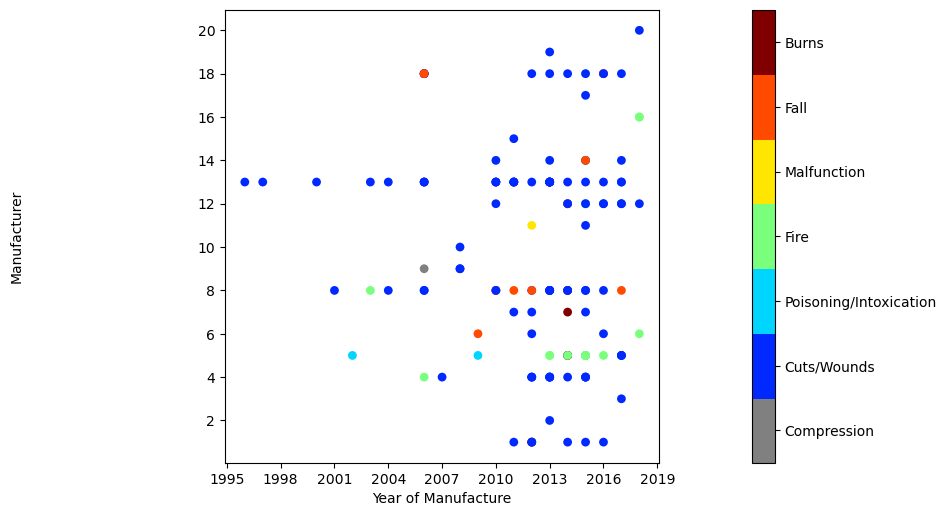

In [21]:
x = ano_de_fabricacao_encoded
y = fabricante_encoded

b2 = tipo_de_risco_encoded

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(0, 7, 8)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

line = ax.scatter(x, y , c=b2, s=40, edgecolors='none',cmap=cmap,norm=norm)
cb = plt.colorbar(line, pad=0.15,ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])

ax.set_xlabel('Year of Manufacture')
ax.set_ylabel('Manufacturer',labelpad=125)

locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().yaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

locator = matplotlib.ticker.MultipleLocator(3)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)


def forceUpdate(event):
    global line
    line.changed()

fig.canvas.mpl_connect('draw_event', forceUpdate)

cb.set_ticklabels(['Compression','Cuts/Wounds','Poisoning/Intoxication','Fire','Malfunction','Fall','Burns'])

plt.show()


### EUROPEAN CASE

In [4]:
df_treatment = pd.read_excel(r"UE_Recall_KNN.xlsx")
df_treatment['Year of manufacture'] = np.nan
years_array = []
for year in range(1950,2025):
    years_array.append(year)
    
for index, row in df_treatment.iterrows():
    if row['Year']<2020 and row['Year']>=2010:
        flag = True
        for year in years_array:
            if str(year) in str(row['Production dates (**)']):
                df_treatment.at[index,'Year of manufacture'] = year
                flag = False
                break
                
        if flag:
            for year in years_array:
                if str(year) in str(row['Batch number / Barcode']):
                    df_treatment.at[index,'Year of manufacture'] = year
                    break
        else:
            pass
    else:
        pass

df = df_treatment.dropna(subset=['Year of manufacture']).reset_index(drop=True)
df['Year of manufacture'] = df['Year of manufacture'].astype(int)
df = df.drop_duplicates(subset='Alert number', keep="last")

df.to_excel(r'Treated_Database_UE.xls',index=False)

In [3]:
df = df[['Year','Alert number','Alert submitted by','Country of origin','Brand','Risk type','Year of manufacture']]

In [4]:
brands = df['Brand'].value_counts().index.tolist()[:20]
df = df[df['Brand'].isin(brands)]
df

,Year,Alert number,Alert submitted by,Country of origin,Brand,Risk type,Year of manufacture
1,2019,A12/00032/19,Portugal,Sweden,Volvo,"Fire, Injuries",2013
2,2019,A12/00028/19,Portugal,Sweden,Volvo,Fire,2013
3,2019,A12/00019/19,France,France,Citroën,Injuries,2019
4,2019,A12/00018/19,France,France,Citroën,Injuries,2019
5,2019,A12/00017/19,Germany,Germany,BMW,Injuries,1999
...,...,...,...,...,...,...,...
2105,2012,A12/1619/12,United Kingdom,Italy,Ford,Fire,2006
2106,2012,A12/1617/12,United Kingdom,South Africa,Ford,Injuries,2011
2107,2012,A12/1616/12,United Kingdom,United Kingdom,Land Rover,Injuries,2011
2109,2012,A12/1268/12,Portugal,"Japan, Turkey, United Kingdom",Toyota,Injuries,2005


In [5]:
brands

['Mercedes-Benz',
 'FCA',
 'Peugeot',
 'Renault',
 'Citroën',
 'Toyota',
 'VW',
 'BMW',
 'Opel',
 'Evobus',
 'Honda',
 'Ford',
 'Mitsubishi',
 'Nissan',
 'Audi',
 'Suzuki',
 'Polaris',
 'Land Rover',
 'Volvo',
 'Jaguar']

In [6]:
#creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
tipo_de_risco_encoded = le.fit_transform(df['Risk type'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


dicionario_proprio = {'Ford':1,'Polaris':2,'Honda':3,'Mitsubishi':4,'Nissan':5,'Suzuki':6,'Toyota':7,'Audi':8,'BMW':9,'Citroën':10,'Evobus':11,'FCA':12,'Jaguar':13,'Land Rover':14,'Mercedes-Benz':15,'Opel':16,'Peugeot':17,'Renault':18,'Volvo':19,'VW':20}
fabricante_encoded = []
for index, row in df.iterrows():
    fabricante_encoded.append(dicionario_proprio[row['Brand']])


fabricante_encoded = np.asarray(fabricante_encoded)
pais_de_origem_encoded = le.fit_transform(df['Country of origin'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

ano_de_fabricacao_encoded = df['Year of manufacture'].tolist()

{'Asphyxiation, Fire': 0, 'Burns': 1, 'Burns, Fire': 2, 'Burns, Fire, Injuries': 3, 'Chemical': 4, 'Damage to hearing': 5, 'Electric shock': 6, 'Environment': 7, 'Environment, Fire': 8, 'Fire': 9, 'Fire, Injuries': 10, 'Injuries': 11}
{'Argentina': 0, 'Argentina, Germany': 1, 'Austria': 2, 'Belgium': 3, 'Belgium, Sweden': 4, 'Brazil, India, Republic of Korea': 5, 'Canada': 6, 'Canada, Mexico, United States': 7, 'Canada, United States': 8, 'China': 9, 'China, Japan, Thailand, Turkey': 10, 'China, Japan, Turkey, United Kingdom, United States': 11, 'China, Japan, United Kingdom': 12, 'Czech Republic': 13, 'France': 14, 'France, Japan': 15, 'France, Japan, South Africa, Turkey, United Kingdom': 16, 'France, Japan, South Africa, United Kingdom': 17, 'France, Japan, Turkey, United Kingdom': 18, 'France, Portugal, Spain': 19, 'France, Russian Federation, Turkey': 20, 'France, Slovenia, Spain': 21, 'France, Spain': 22, 'France, Turkey': 23, 'France, United Kingdom': 24, 'Germany': 25, 'Germany

In [7]:
features=list(zip(fabricante_encoded,ano_de_fabricacao_encoded))
label = tipo_de_risco_encoded

In [8]:
#create model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

KNeighborsClassifier(n_neighbors=3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177676537585421


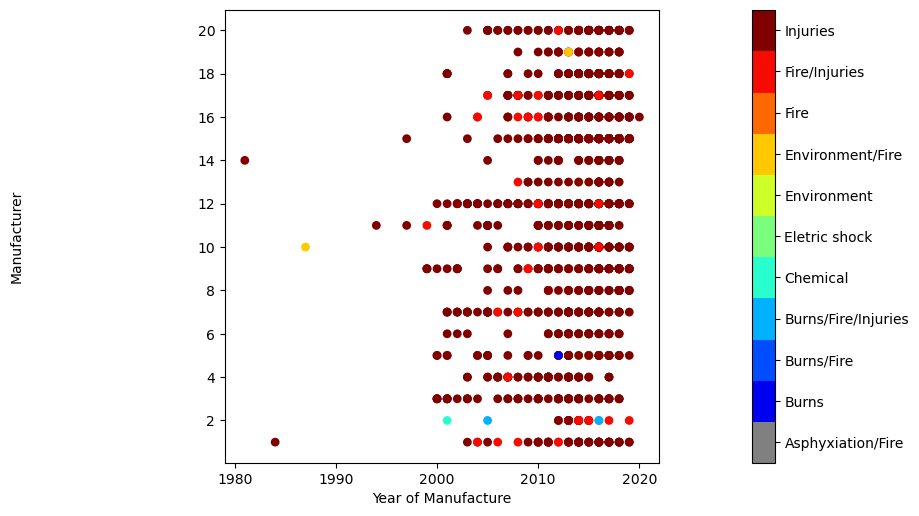

In [11]:
x = ano_de_fabricacao_encoded
y = fabricante_encoded

b2 = tipo_de_risco_encoded

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(0, 11, 12)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

line = ax.scatter(x, y , c=b2, s=40, edgecolors='none',cmap=cmap,norm=norm)
cb = plt.colorbar(line, pad=0.15,ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])

ax.set_xlabel('Year of Manufacture')
ax.set_ylabel('Manufacturer',labelpad=125)

locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().yaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

locator = matplotlib.ticker.MultipleLocator(10)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)


def forceUpdate(event):
    global line
    line.changed()

fig.canvas.mpl_connect('draw_event', forceUpdate)

cb.set_ticklabels(['Asphyxiation/Fire','Burns','Burns/Fire','Burns/Fire/Injuries','Chemical','Eletric shock','Environment','Environment/Fire','Fire','Fire/Injuries','Injuries'])

plt.show()